In [2]:


import os
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np


import photutils 
from photutils.aperture import CircularAperture, aperture_photometry, ApertureStats

from astropy.modeling.models import Sersic1D as S1D

from scipy import optimize as sopt

Filename: C:/Users/shyam/Desktop/mciroproject/LCO/Face_on/NGC3982_banzai/lco_data-20240101-8\ogg2m001-ep02-20231228-0885-e91.fits.fz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SCI           1 CompImageHDU    269   (2048, 2048)   float32   
  2  CAT           1 BinTableHDU    127   40R x 40C   [D, D, D, D, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, D, D, D, D]   
  3  BPM           1 CompImageHDU      9   (2048, 2048)   uint8   
  4  ERR           1 CompImageHDU     10   (2048, 2048)   float32   


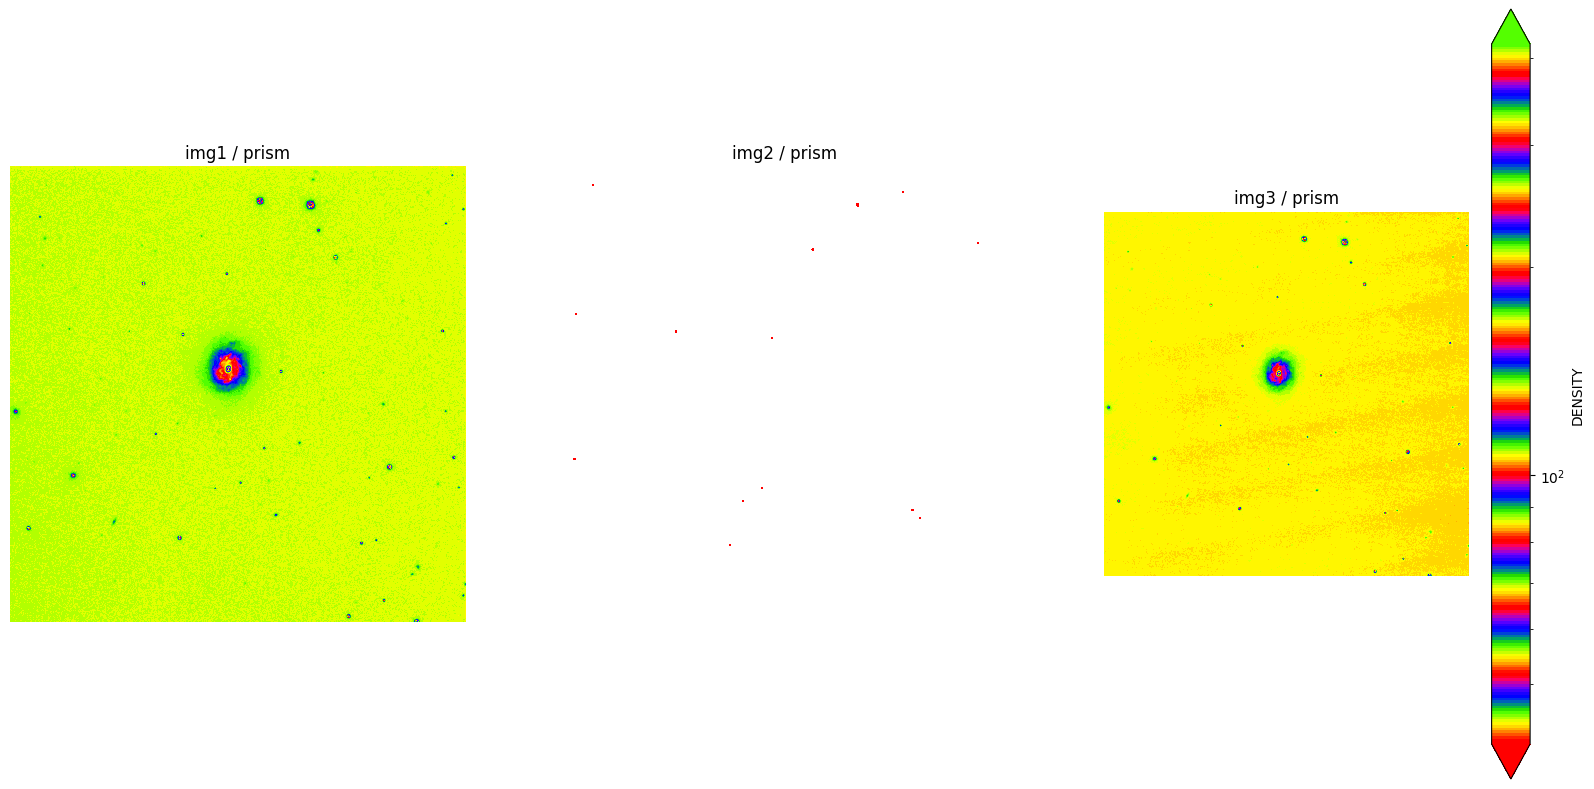

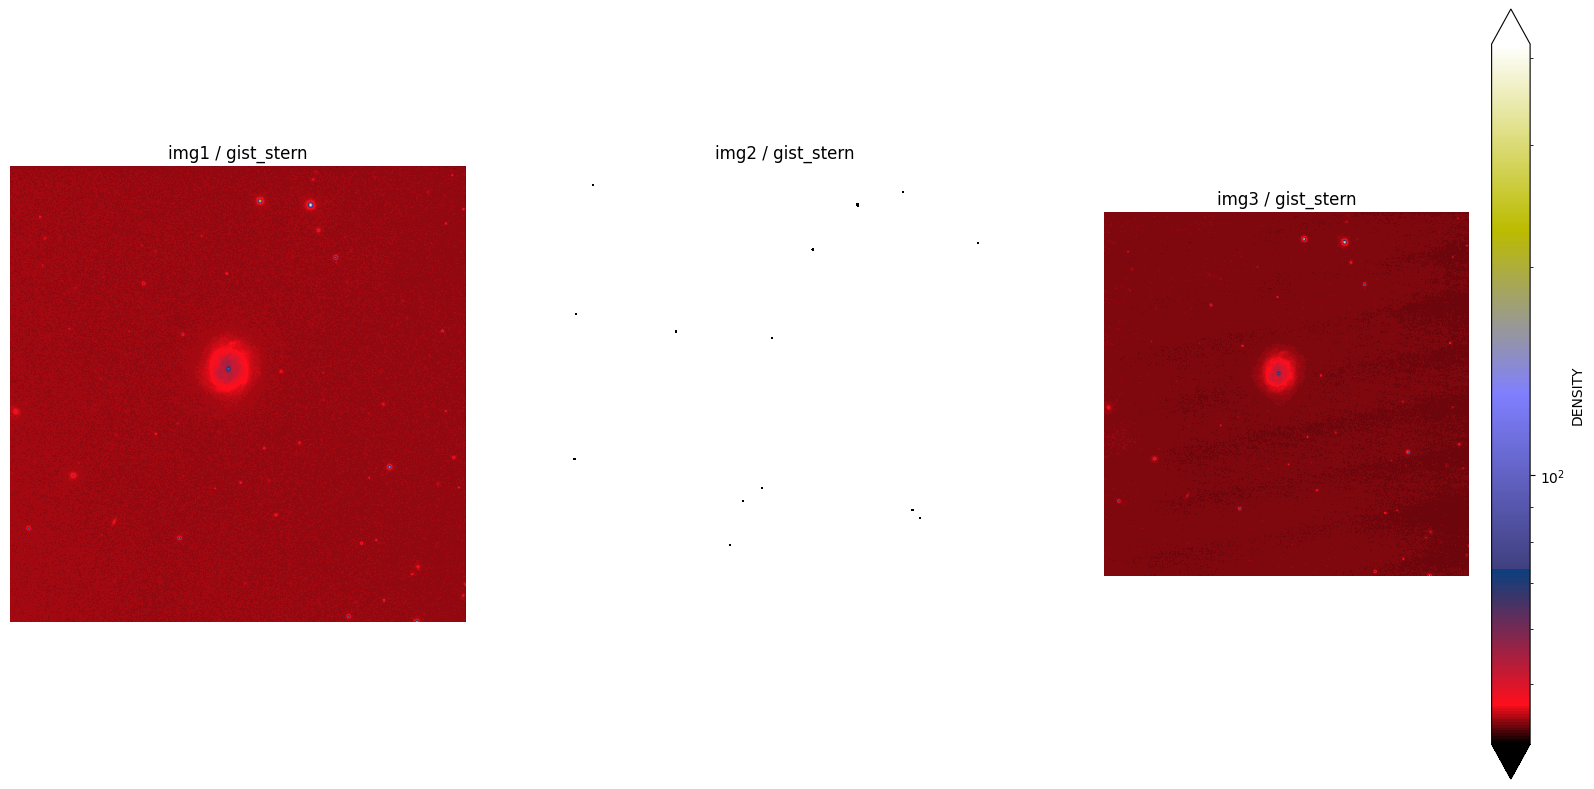

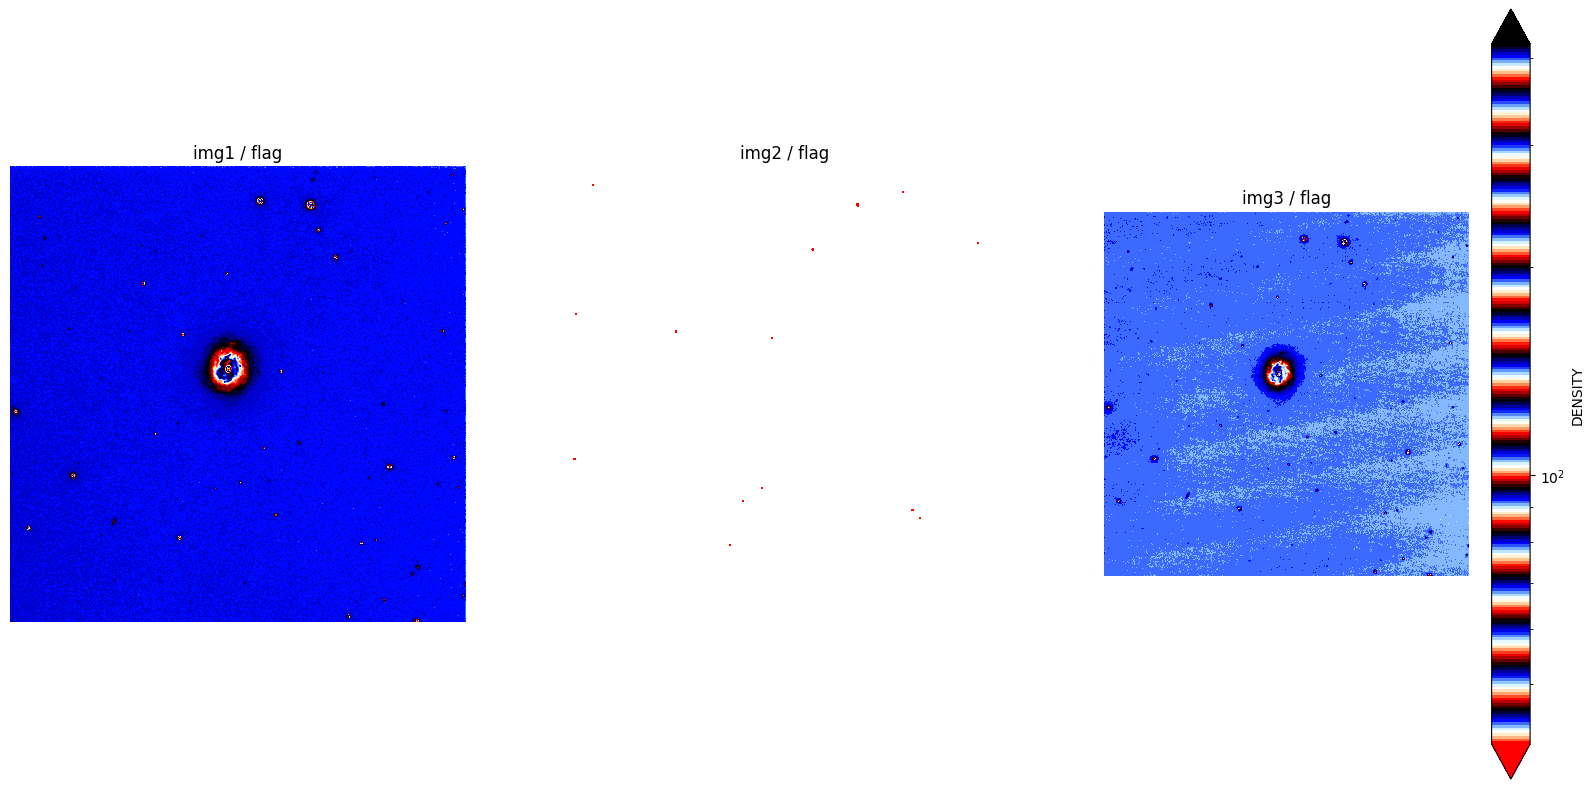

Filename: C:/Users/shyam/Desktop/mciroproject/LCO/Face_on/NGC3982_banzai/lco_data-20240101-8\ogg2m001-ep02-20231228-0886-e91.fits.fz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SCI           1 CompImageHDU    269   (2048, 2048)   float32   
  2  CAT           1 BinTableHDU    127   39R x 40C   [D, D, D, D, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, D, D, D, D]   
  3  BPM           1 CompImageHDU      9   (2048, 2048)   uint8   
  4  ERR           1 CompImageHDU     10   (2048, 2048)   float32   


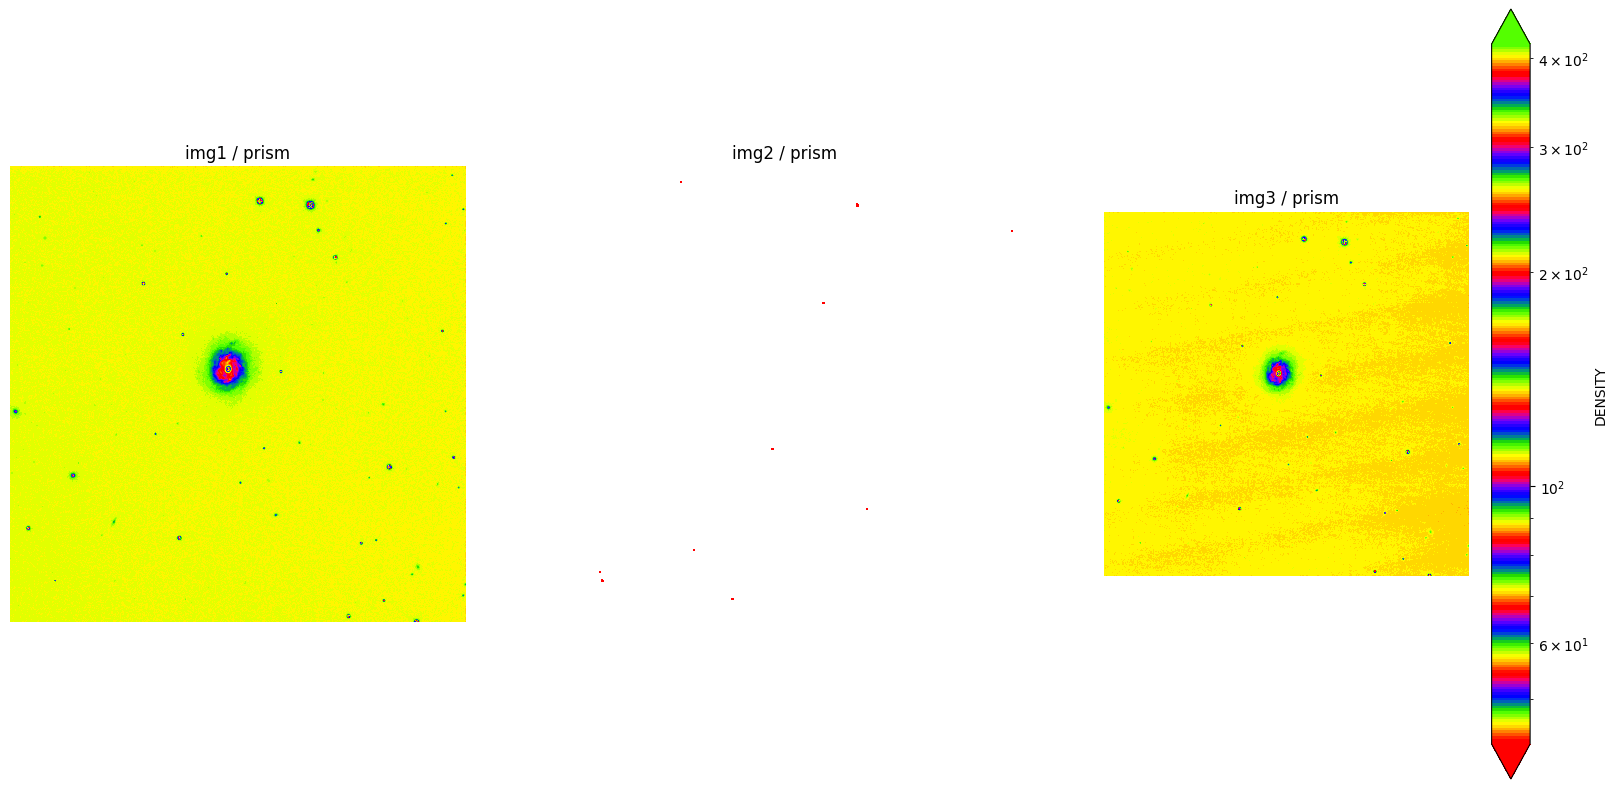

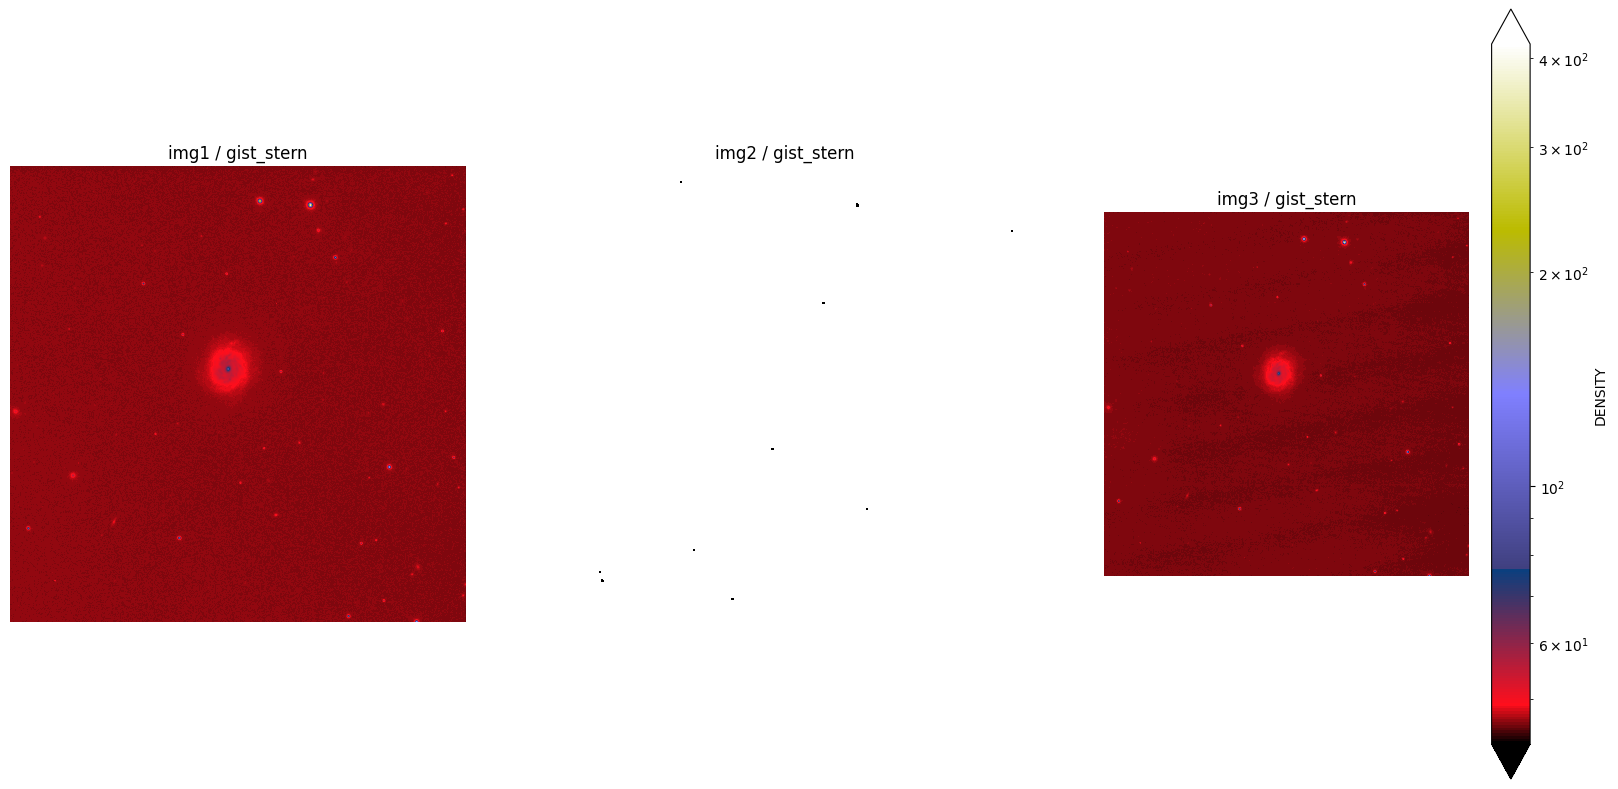


KeyboardInterrupt



In [91]:
NGC3982_path = "C:/Users/shyam/Desktop/mciroproject/LCO/Face_on/NGC3982_banzai/lco_data-20240101-8"

folder_path = NGC3982_path

cmap_list = ["prism", "gist_stern", "flag"]

for file_name in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, file_name)) and file_name.endswith('.fits.fz'):
        with fits.open(os.path.join(folder_path, file_name)) as file:
            file.info()
            
            img1 = file[1].data
            img2 = file[3].data
            img3 = file[4].data
            
            for x_spec in cmap_list:
                figure,axis = plt.subplots(1,3,figsize=(20,20))
                axis[0].imshow(img1, norm = LogNorm(), cmap=x_spec)
                axis[0].set_title("img1" + " / "+ x_spec)
                axis[0].axis("off")

                axis[1].imshow(img2,norm = LogNorm(), cmap=x_spec)
                axis[1].set_title("img2" + " / "+ x_spec)
                axis[1].axis("off")
                
                density_func = axis[2].imshow(img3,norm = LogNorm(), cmap=x_spec)
                axis[2].set_title("img3" + " / "+ x_spec)
                axis[2].axis("off")

                figure.colorbar(density_func,shrink=0.5,label="DENSITY",location="right",extend="both")
                plt.show()

In [3]:
file = fits.open(r'C:\Users\shyam\Desktop\mciroproject\LCO\Face_on\NGC3982_banzai\lco_data-20240101-8\ogg2m001-ep02-20231228-0886-e91.fits.fz')

f = file.info()


Filename: C:\Users\shyam\Desktop\mciroproject\LCO\Face_on\NGC3982_banzai\lco_data-20240101-8\ogg2m001-ep02-20231228-0886-e91.fits.fz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SCI           1 CompImageHDU    269   (2048, 2048)   float32   
  2  CAT           1 BinTableHDU    127   39R x 40C   [D, D, D, D, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, D, D, D, D]   
  3  BPM           1 CompImageHDU      9   (2048, 2048)   uint8   
  4  ERR           1 CompImageHDU     10   (2048, 2048)   float32   


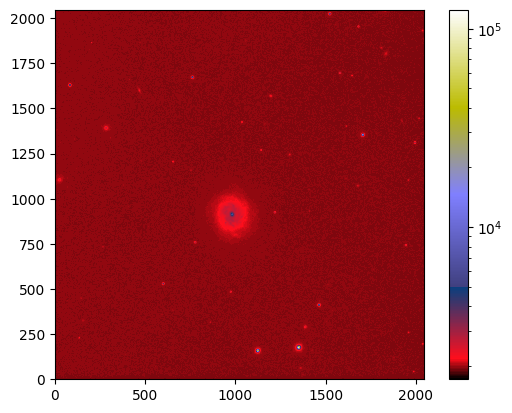

In [4]:
img1 = file[1].data

plt.imshow(img1, norm=LogNorm(), origin='lower', cmap='gist_stern')
plt.colorbar()
plt.show()

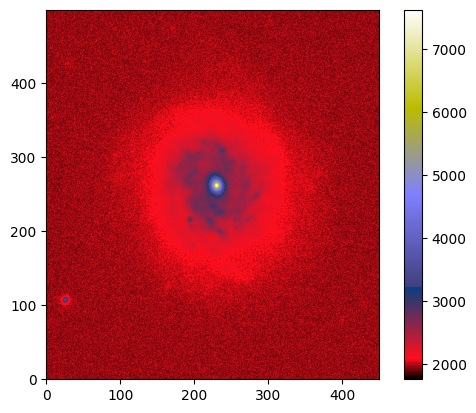

In [5]:
# matplotlib widget
img1_crop = img1[650:1150, 750:1200]
plt.imshow(img1_crop, origin='lower', cmap='gist_stern')
plt.colorbar()
plt.show()

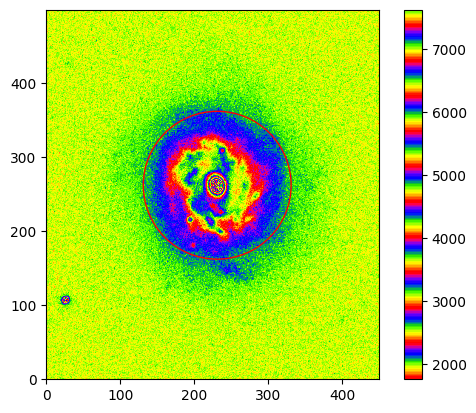

In [6]:
center = [231, 262]

plt.imshow(img1_crop, origin='lower', cmap='prism')
ap1 = CircularAperture(center, 100)
ap1.plot(color='red', lw=1)
plt.colorbar()
plt.show()

In [7]:
r_b = np.linspace(1, 75, 150)
r_d = np.linspace(76, 100, 30)
pos = np.append(r_b, r_d)


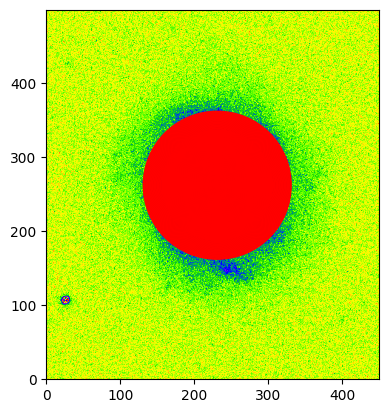

In [8]:

# pos = np.linspace(1,150, 150)
#pos = np.array([10,20,30,40,50,60,70,80,90,100])

flux = []
flux_stats = []

for i in range(len(pos)):
    plt.imshow(img1_crop, origin='lower', cmap='prism')
    aper = CircularAperture(center, pos[i])
    aper.plot(color='red', lw =1)
    
    phot_table = aperture_photometry(img1_crop, aper)
    
    aperstats = ApertureStats(img1_crop, aper)
    
    flux_stats.append(aperstats.sum)
    flux.append(phot_table['aperture_sum'][0])
    
plt.show()   

In [9]:
rad_arc = 0.267188 * np.diff(pos**2)

s_bright = np.diff(flux) / (np.pi * rad_arc)

s_bright1 = np.concatenate(([26846.151811704174], s_bright))


In [10]:
print(len(s_bright1))
print(len(pos))

print(np.median(s_bright1))

180
180
9501.875513025698


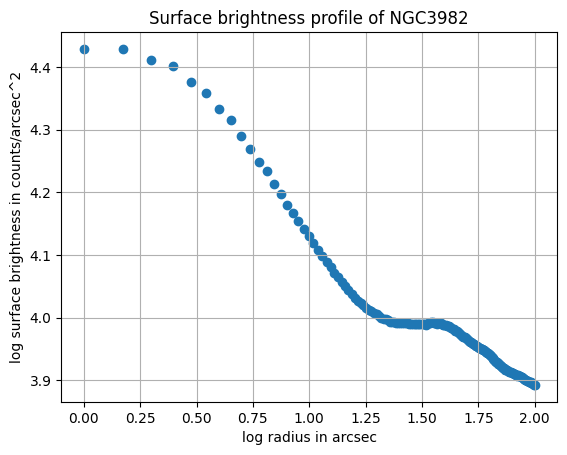

In [28]:
plt.figure()
plt.scatter(np.log10(pos), np.log10(s_bright1))
# plt.xlim(0, 10)
# plt.ylim(0, 10)
plt.title('Surface brightness profile of NGC3982')
plt.xlabel('log radius in arcsec')
plt.ylabel('log surface brightness in counts/arcsec^2')
plt.grid()
plt.show()

In [12]:
def sersic(pos, I_e, r_e, n_e):
    s1 = S1D(I_e, r_e, n_e)
    return s1(pos)

[4.00000000e+03 1.00000000e+02 8.85438776e-01]


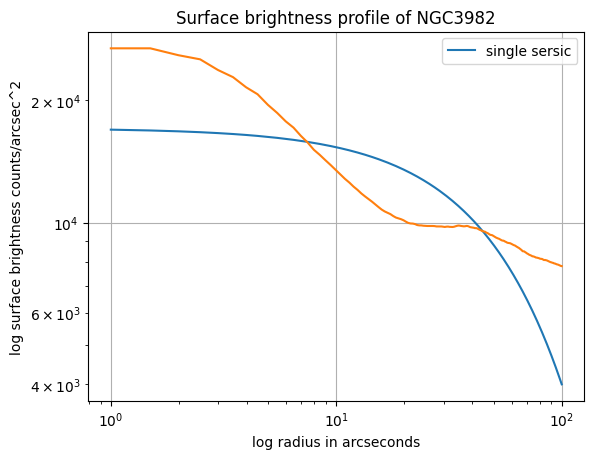

In [29]:
I_e = 9501
r_e = 75
n_e = 0.5



param_opt, cov_opt = sopt.curve_fit(sersic, pos, s_bright1, bounds=((0,pos[0],0), (4000, pos[len(pos)-1], 10)), maxfev=10000 )


# plt.plot(pos, s_bright1)


plt.loglog(pos, sersic(pos, *param_opt), label='single sersic')
plt.loglog(pos, s_bright1)
plt.title('Surface brightness profile of NGC3982')
plt.xlabel('log radius in arcseconds')
plt.ylabel('log surface brightness counts/arcsec^2')
plt.legend()
print(param_opt)
plt.grid()

In [14]:
R_thresh = 40

[7.19965155e+03 1.00000000e+02 2.69093679e-01]


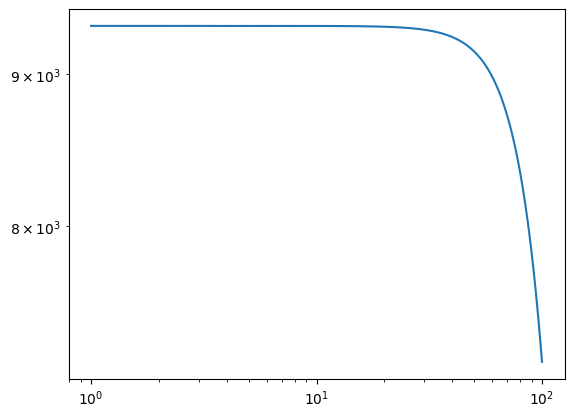

In [15]:
R_disc = pos[pos > R_thresh]
I_disc = s_bright1[pos > R_thresh]

optgal_disc, covgal_disc = sopt.curve_fit(sersic, R_disc, I_disc, bounds=((0,pos[0],0), (1e5, pos[len(pos)-1] , 10)), maxfev=10000)

print(optgal_disc)

plt.loglog(pos, sersic(pos, *optgal_disc))

[1000.          100.            2.12286722]


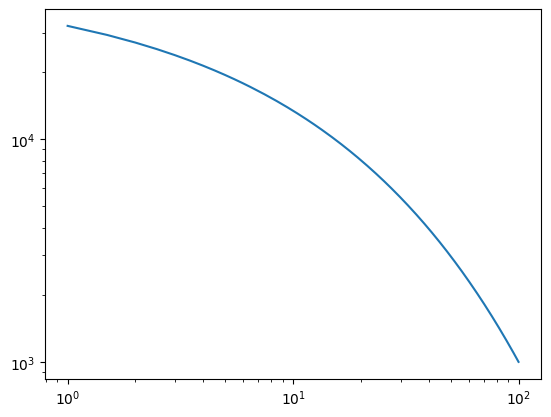

In [16]:
R_bulge = pos[pos < R_thresh]
I_bulge = s_bright1[pos < R_thresh]

optgal_bulge, covgal_bulge = sopt.curve_fit(sersic, R_bulge, I_bulge, bounds=((0,pos[0],0), (1e3, pos[len(pos)-1] , 10)), maxfev=10000)

print(optgal_bulge)

plt.loglog(pos, sersic(pos, *optgal_bulge))

In [17]:
def disc(pos):
    return sersic(pos, *optgal_disc)

def bulge(pos):
    return sersic(pos, *optgal_bulge)

def sersic_2(pos, I_b, R_b, n_b, I_d, R_d, n_d):
    return S1D(I_b, R_b, n_b) (pos) + S1D(I_d, R_d, n_d) (pos)

In [18]:
optgal_2d, covgal_2d = sopt.curve_fit(sersic_2, pos, s_bright1, bounds=((0,pos[0],0, 0,pos[0],0), (1e5, pos[len(pos)-1] , 10, 1e5, pos[len(pos)-1], 10)), maxfev=10000)

print(optgal_2d)

[7.01344558e+03 1.00000000e+02 3.02512713e-01 5.50036419e+03
 8.18204751e+00 8.01520694e-01]


In [19]:
print(optgal_2d[0:3])

[7.01344558e+03 1.00000000e+02 3.02512713e-01]


<function matplotlib.pyplot.show(close=None, block=None)>

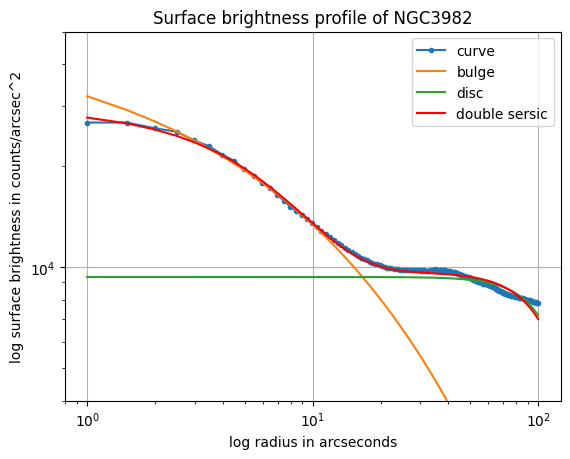

In [30]:
plt.loglog(pos, s_bright1, label='curve', marker='o', markersize = 3)


# plt.loglog(pos, sersic(pos, *optgal_2d[0:3]), label='disc')
# # plt.loglog(pos, sersic(pos, *optgal_2d[3:6]), label='disc')

plt.loglog(pos, bulge(pos), label='bulge')
plt.loglog(pos, disc(pos), label='disc')

# plt.loglog(pos, sersic(pos, *param_opt), label='single sersic')

plt.loglog(pos, sersic_2(pos, *optgal_2d), 'r', label='double sersic')

plt.ylim(4000, 50000)
# plt.xscale('log')
# plt.yscale('log')
plt.title('Surface brightness profile of NGC3982')
plt.xlabel('log radius in arcseconds')
plt.ylabel('log surface brightness in counts/arcsec^2')
plt.grid(True)
plt.legend()
plt.show